# The summary of exit surveys from empolyees of the DETE and TAFE datasets


In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)
%matplotlib inline
import matplotlib.style as style

We will answer the two following questions: <br>

What is the resigning cause of people who worked in the company for a short and long time?

What is the resigning cause of people who are younger and older?

In [2]:
dete_survey=pd.read_csv('dete_survey.csv')
tafe_survey=pd.read_csv('tafe_survey.csv')

In [3]:
dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
dete_survey.isnull().sum()


ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [5]:
dete_survey.notnull().sum()

ID                                     822
SeparationType                         822
Cease Date                             822
DETE Start Date                        822
Role Start Date                        822
Position                               817
Classification                         455
Region                                 822
Business Unit                          126
Employment Status                      817
Career move to public sector           822
Career move to private sector          822
Interpersonal conflicts                822
Job dissatisfaction                    822
Dissatisfaction with the department    822
Physical work environment              822
Lack of recognition                    822
Lack of job security                   822
Work location                          822
Employment conditions                  822
Maternity/family                       822
Relocation                             822
Study/Travel                           822
Ill Health 

We can observe that in dete_survey data frame the missing values instead of being filled with Nan, are filled with 'Not Stated'. To avoid that, the 'dete_survey.csv' dataframe needs to be opened again with parameter which define Nan values.

In [6]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [7]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [8]:
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

Some of the name columns in both dataframes are exacly or almost the same.

In [9]:
dete_survey=pd.read_csv('dete_survey.csv', na_values='Not Stated')

Dropping columns in both dataframes which we do not need

In [10]:
dete_survey_updated=dete_survey.drop(dete_survey.columns[28:49], axis = 1)

In [11]:
tafe_survey_updated=tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)


Now we will work on column names

In [12]:
dete_survey_updated.columns=dete_survey_updated.columns.str.lower().str.rstrip().str.replace('\s+', '_')
print(dete_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


In [13]:

tafe_survey_updated=tafe_survey_updated.rename(columns={'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'})

In [14]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [15]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [16]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [17]:
dete_resignations=dete_survey_updated.copy()
tafe_resignations=tafe_survey_updated.copy()


In [18]:
tafe_resignations=tafe_resignations[tafe_resignations['separationtype']=='Resignation']
tafe_resignations['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

In [19]:
pattern=r"[Rr]esignation"
dete_resignations=dete_survey_updated.loc[(dete_survey_updated['separationtype'].str.contains(pattern))]

In [20]:
dete_resignations['cease_date'].value_counts()



2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2006      1
2010         1
09/2010      1
07/2012      1
Name: cease_date, dtype: int64

We will get rid off the months in 'cease_date' column and leave year only

In [21]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)

In [22]:
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [23]:
dete_resignations['cease_date'].value_counts().sort_index(ascending=False)

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [24]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [25]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending=False)

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64

In [26]:
dete_resignations['institute_service']=dete_resignations['cease_date'] - dete_resignations['dete_start_date']

We have created the column in dete resignations dataset which contains service in years.

In [27]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [28]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [29]:
def update_vals(value):
    if pd.isnull(value):
        return np.nan
    elif value == '-':
        return False
    else:
        return True
    

In [30]:
def data_frame(dataset, column_names):
    dataset['dissatisfied'] = dataset[column_names].applymap(update_vals).any(axis=1,skipna=False)
    return dataset.copy()
    

In [31]:
dete_resignations_up=data_frame(dete_resignations,['job_dissatisfaction',
                                                  'dissatisfaction_with_the_department',
                                                  'physical_work_environment',
                                                  'lack_of_recognition',
                                                  'lack_of_job_security',
                                                  'work_location',
                                                  'employment_conditions',
                                                  'work_life_balance',
                                                  'workload'])
  
tafe_resignations_up = data_frame(tafe_resignations, 
                                    ['Contributing Factors. Dissatisfaction',
                                     'Contributing Factors. Job Dissatisfaction'])

In [32]:
tafe_resignations_up['dissatisfied'].value_counts()

False    241
True      91
Name: dissatisfied, dtype: int64

Above, we created column 'dissatisfied' in both datasets which has two values: True and False. If any factor in dete_resignations columns listed above was set as True - in 'dissatisfied' column there also will be True. Same case in tafe_resignations but there we have only 2 factor columns.

In [33]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [34]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], axis=0)

In [35]:
combined_updated=combined.dropna(axis=1, thresh=500).copy()

In [36]:
combined_updated

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
3,4.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7,True,DETE
5,6.000000e+00,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
8,9.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3,True,DETE
9,1.000000e+01,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE
11,1.200000e+01,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3,True,DETE
...,...,...,...,...,...,...,...,...,...,...
696,6.350660e+17,Resignation,2013.0,Operational (OO),Temporary Full-time,Male,21 25,5-6,False,TAFE
697,6.350668e+17,Resignation,2013.0,Teacher (including LVT),Temporary Full-time,Male,51-55,1-2,False,TAFE
698,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,False,TAFE
699,6.350704e+17,Resignation,2013.0,Teacher (including LVT),Permanent Full-time,Female,51-55,5-6,False,TAFE


We have done pretty much above, starting with adding column 'institution', which helps us distinguish between TAFE and DETE row.
Next we combined both dataframes and later on removed columns with less than 500 non null values, so dataframe is much more readable now.

In [37]:
combined_updated['institute_service']

3        7
5       18
8        3
9       15
11       3
      ... 
696    5-6
697    1-2
698    NaN
699    5-6
701    3-4
Name: institute_service, Length: 651, dtype: object

In [38]:
combined_updated['institute_service']=combined_updated['institute_service'].astype('str')

In [39]:
combined_updated['institute_service']=combined_updated['institute_service'].str.replace('-', ',').str.replace(' ', ',').str.extract(r"([1-9][0-9]?)").astype('float')

In [40]:
combined_updated['institute_service']

3       7.0
5      18.0
8       3.0
9      15.0
11      3.0
       ... 
696     5.0
697     1.0
698     NaN
699     5.0
701     3.0
Name: institute_service, Length: 651, dtype: float64

In [41]:
def career_stage(years):
    if pd.isnull(years):
        return np.nan
    if years < 3:
        return "New"
    if (years >= 3) and (years <=6):
        return "Experienced"
    if (years > 6) and(years <11):
        return "Established"
    if years >= 11:
        return "Veteran"

In [42]:
combined_updated['service_cat']=combined_updated['institute_service'].apply(career_stage)

In [43]:
combined_updated['service_cat']

3      Established
5          Veteran
8      Experienced
9          Veteran
11     Experienced
          ...     
696    Experienced
697            New
698            NaN
699    Experienced
701    Experienced
Name: service_cat, Length: 651, dtype: object

Based on 'institute_service' column where there are workers service in years,
we created new column 'service_cat' which define the worker experience.

In [44]:
combined_updated['dissatisfied'].value_counts(dropna=False)

True     402
False    241
NaN        8
Name: dissatisfied, dtype: int64

In [45]:
combined_updated['dissatisfied'].fillna(True, inplace=True)

In [46]:
combined_updated['dissatisfied'].value_counts(dropna=False)

True     410
False    241
Name: dissatisfied, dtype: int64

In [69]:
p_table=round(combined_updated.pivot_table(index=['service_cat'], values=['dissatisfied'])*100)
p_table=p_table.sort_values(by=['dissatisfied'], ascending=True)
p_table

,dissatisfied
service_cat,
New,42.0
Experienced,58.0
Established,77.0
Veteran,81.0


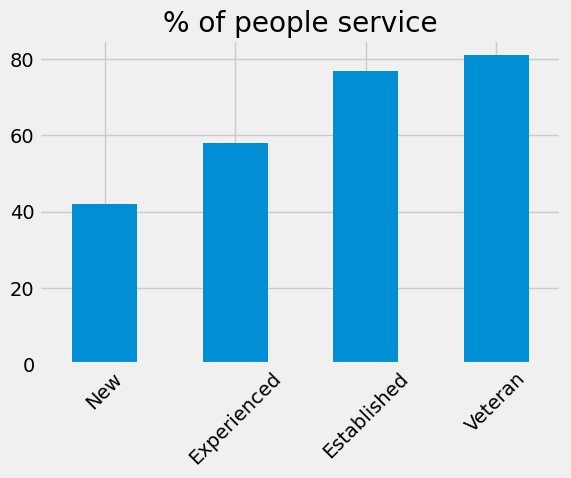

In [68]:
style.use('fivethirtyeight')
p_table.plot(kind='bar', rot=45, legend=False, title='% of people service')
plt.xlabel('')
plt.show()

The more workers last in a company, the more they are dissatisfied. It is normal occurence, we all get bored and tired with time. 